## IPL Pipeline
Goal : The goal of this project is to build a data pipeline that extracts data from external sources, transforms the data and loads it into a data storage facility. Ever since reading that IPL has the 2nd highest average salary after the NBA, i was curious to see what these figures may be.

Stakeholders:
Hinesh, Alex and Adam
 ##### Reminder 'Value' is a measurement of what their salary 'should be' based on their performance this year.



In [1]:
# Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

###### Here i am using BeautifulSoup to scrape and extract data on all 10 IPL teams

In [2]:
csk_url = 'https://en.wikipedia.org/wiki/Chennai_Super_Kings'
csk_response = requests.get(csk_url)

# Check if the response was successful (status code 200)
if csk_response.status_code == 200:
    csk_soup = BeautifulSoup(csk_response.content, 'html.parser')
    csk_tables = csk_soup.find_all('table')

    # Check if the desired table is present
    if len(csk_tables) > 1:
        csk_table = csk_tables[14]

        # Extract the table data
        csk_table_data = []
        for csk_row in csk_table.find_all('tr'):
            csk_row_data = []
            for csk_cell in csk_row.find_all(['th', 'td']):
                csk_row_data.append(csk_cell.text.strip())
            csk_table_data.append(csk_row_data)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", csk_response.status_code)




In [3]:
df_csk = pd.DataFrame(csk_table_data[1:], columns=csk_table_data[0])
csk_team_name = 'CSK'
df_csk['Team'] = csk_team_name
print(df_csk)

               No.                    Name   Nationality  \
0          Batters                    None          None   
1                9           Ambati Rayudu         India   
2               21          Ajinkya Rahane         India   
3               31         Ruturaj Gaikwad         India   
4               66           Shaik Rasheed         India   
5               88            Devon Conway   New Zealand   
6                —     Subhranshu Senapati         India   
7   Wicket-keepers                    None          None   
8                7                MS Dhoni         India   
9     All-rounders                    None          None   
10               8         Ravindra Jadeja         India   
11              10  Rajvardhan Hangargekar         India   
12              18               Moeen Ali       England   
13              19             Ajay Mandal         India   
14              25             Shivam Dube         India   
15              27          Nishant Sind

In [4]:

mi_url = 'https://en.wikipedia.org/wiki/Mumbai_Indians'
mi_response = requests.get(mi_url)

# Check if the response was successful (status code 200)
if mi_response.status_code == 200:
    mi_soup = BeautifulSoup(mi_response.content, 'html.parser')
    mi_tables = mi_soup.find_all('table')

    # Check if the desired table is present
    if len(mi_tables) > 1:
        mi_table = mi_tables[5]

        # Extract the table data
        mi_table_data = []
        for mi_row in mi_table.find_all('tr'):
            mi_row_data = []
            for mi_cell in mi_row.find_all(['th', 'td']):
                mi_row_data.append(mi_cell.text.strip())
            mi_table_data.append(mi_row_data)

        df_mi = pd.DataFrame(mi_table_data[1:], columns=mi_table_data[0])
        mi_team_name = 'MI'
        df_mi['Team'] = mi_team_name
        print(df_mi)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", mi_response.status_code)


                  No.               Name   Nationality  \
0             Batters               None          None   
1                   8          Tim David     Australia   
2                  13    Ramandeep Singh         India   
3                  19      Nehal Wadhera         India   
4                  45       Rohit Sharma         India   
5                  63   Suryakumar Yadav         India   
6        All Rounders               None          None   
7                   9        Tilak Varma         India   
8                  17      Dewald Brevis  South Africa   
9                  33      Piyush Chawla         India   
10                 42      Cameron Green     Australia   
11                  —       Shams Mulani         India   
12      Wicketkeepers               None          None   
13                  4       Vishnu Vinod         India   
14                 12     Tristan Stubbs  South Africa   
15                 23       Ishan Kishan         India   
16       Spin 

In [5]:
df_mi.head()

,No.,Name,Nationality,Birth date,Batting style,Bowling style,Year signed,Salary,Notes,Team
0,Batters,None,None,None,None,None,None,None,None,MI
1,8,Tim David,Australia,(1996-03-16) 16 March 1996 (age 27),Right-handed,Right-arm off break,2022,₹8.25 crore (US$1.0 million),Overseas,MI
2,13,Ramandeep Singh,India,(1997-04-13) 13 April 1997 (age 26),Right-handed,Right-arm medium,2022,"₹20 lakh (US$25,000)",,MI
3,19,Nehal Wadhera,India,(2000-09-04) 4 September 2000 (age 22),Left-handed,Right-arm leg break,2023,"₹20 lakh (US$25,000)",,MI
4,45,Rohit Sharma,India,(1987-04-30) 30 April 1987 (age 36),Right-handed,Right-arm off break,2011,₹16 crore (US$2.0 million),Captain,MI


In [6]:
srh_url = 'https://en.wikipedia.org/wiki/Sunrisers_Hyderabad'
srh_response = requests.get(srh_url)

# Check if the response was successful (status code 200)
if srh_response.status_code == 200:
    srh_soup = BeautifulSoup(srh_response.content, 'html.parser')
    srh_tables = srh_soup.find_all('table')

    # Check if the desired table is present
    if len(srh_tables) > 1:
        srh_table = srh_tables[4]

        # Extract the table data
        srh_table_data = []
        for srh_row in srh_table.find_all('tr'):
            srh_row_data = []
            for srh_cell in srh_row.find_all(['th', 'td']):
                srh_row_data.append(srh_cell.text.strip())
            srh_table_data.append(srh_row_data)

        df_srh = pd.DataFrame(srh_table_data[1:], columns=srh_table_data[0])
        srh_team_name = 'SRH'
        df_srh['Team'] = srh_team_name
        print(df_srh)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", srh_response.status_code)


                    No.                Name   Nationality  \
0               Batters                None          None   
1                    94       Aiden Markram  South Africa   
2                    16      Mayank Agarwal         India   
3                    52      Rahul Tripathi         India   
4                    88         Harry Brook       England   
5                    14        Samarth Vyas         India   
6                     1         Abdul Samad         India   
7                    63    Anmolpreet Singh         India   
8        Wicket-keepers                None          None   
9                     6      Glenn Phillips   New Zealand   
10                   45    Heinrich Klaasen  South Africa   
11                            Upendra Yadav         India   
12         All-rounders                None          None   
13                    4     Abhishek Sharma         India   
14                    5   Washington Sundar         India   
15                   70 

In [7]:
lsg_url = 'https://en.wikipedia.org/wiki/Lucknow_Super_Giants'
lsg_response = requests.get(lsg_url)

# Check if the response was successful (status code 200)
if lsg_response.status_code == 200:
    lsg_soup = BeautifulSoup(lsg_response.content, 'html.parser')
    lsg_tables = lsg_soup.find_all('table')

    # Check if the desired table is present
    if len(lsg_tables) > 1:
        lsg_table = lsg_tables[8]

        # Extract the table data
        lsg_table_data = []
        for lsg_row in lsg_table.find_all('tr'):
            lsg_row_data = []
            for lsg_cell in lsg_row.find_all(['th', 'td']):
                lsg_row_data.append(lsg_cell.text.strip())
            lsg_table_data.append(lsg_row_data)

        df_lsg = pd.DataFrame(lsg_table_data[1:], columns=lsg_table_data[0])
        lsg_team_name = 'LSG'
        df_lsg['Team'] = lsg_team_name
        print(df_lsg)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", lsg_response.status_code)


                   No.                Name   Nationality  \
0              Batters                None          None   
1                   18         Manan Vohra         India   
2                    3        Ayush Badoni         India   
3       Wicket-keepers                None          None   
4                    1            KL Rahul         India   
5                   12     Quinton de Kock  South Africa   
6                   29     Nicholas Pooran   West Indies   
7         All-rounders                None          None   
8                    7  Krishnappa Gowtham         India   
9                   17      Marcus Stoinis     Australia   
10                  25       Krunal Pandya         India   
11                  71         Kyle Mayers   West Indies   
12                  95         Daniel Sams     Australia   
13                  57        Deepak Hooda         India   
14                  24        Karan Sharma         India   
15                  46       Prerak Mank

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

rr_url = 'https://en.wikipedia.org/wiki/Rajasthan_Royals'
rr_response = requests.get(rr_url)

# Check if the response was successful (status code 200)
if rr_response.status_code == 200:
    rr_soup = BeautifulSoup(rr_response.content, 'html.parser')
    rr_tables = rr_soup.find_all('table')

    # Check if the desired table is present
    if len(rr_tables) > 1:
        rr_table = rr_tables[3]

        # Extract the table data
        rr_table_data = []
        for rr_row in rr_table.find_all('tr'):
            rr_row_data = []
            for rr_cell in rr_row.find_all(['th', 'td']):
                rr_row_data.append(rr_cell.text.strip())
            rr_table_data.append(rr_row_data)

        df_rr = pd.DataFrame(rr_table_data[1:], columns=rr_table_data[0])
        rr_team_name = 'RR'
        df_rr['Team'] = rr_team_name
        print(df_rr)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", rr_response.status_code)


                  No.                 Name   Nationality  \
0             Batters                 None          None   
1                   5          Riyan Parag         India   
2                  19     Yashasvi Jaiswal         India   
3                  21          Dhruv Jurel         India   
4                  37     Devdutt Padikkal         India   
5                  63          Jos Buttler       England   
6                  66             Joe Root       England   
7                 189      Shimron Hetmyer   West Indies   
8      Wicket-keepers                 None          None   
9                  11         Sanju Samson         India   
10                  —     Donavon Ferreira  South Africa   
11                  —  Kunal Singh Rathore         India   
12       All-rounders                 None          None   
13                  4         Abdul Basith         India   
14                 98         Jason Holder   West Indies   
15                 99  Ravichandran Ashw

In [9]:
rcb_url = 'https://en.wikipedia.org/wiki/Royal_Challengers_Bangalore'
rcb_response = requests.get(rcb_url)

# Check if the response was successful (status code 200)
if rcb_response.status_code == 200:
    rcb_soup = BeautifulSoup(rcb_response.content, 'html.parser')
    rcb_tables = rcb_soup.find_all('table')

    # Check if the desired table is present
    if len(rcb_tables) > 1:
        rcb_table = rcb_tables[6]

        # Extract the table data
        rcb_table_data = []
        for rcb_row in rcb_table.find_all('tr'):
            rcb_row_data = []
            for rcb_cell in rcb_row.find_all(['th', 'td']):
                rcb_row_data.append(rcb_cell.text.strip())
            rcb_table_data.append(rcb_row_data)

        df_rcb = pd.DataFrame(rcb_table_data[1:], columns=rcb_table_data[0])
        rcb_team_name = 'RCB'
        df_rcb['Team'] = rcb_team_name
        print(df_rcb)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", rcb_response.status_code)


                    No.                 Name   Nationality  \
0               Batters                 None          None   
1                    13       Faf du Plessis  South Africa   
2                    18          Virat Kohli         India   
3                    97        Rajat Patidar         India   
4                                 Finn Allen   New Zealand   
5                                 Will Jacks       England   
6        Wicket-keepers                 None          None   
7                    19       Dinesh Karthik         India   
8                    27           Anuj Rawat         India   
9          All-rounders                 None          None   
10                    4    Michael Bracewell   New Zealand   
11                    6       Mahipal Lomror         India   
12                   15         David Willey       England   
13                   21        Shahbaz Ahmed         India   
14                   32        Glenn Maxwell     Australia   
15      

In [10]:
kkr_url = 'https://en.wikipedia.org/wiki/Kolkata_Knight_Riders'
kkr_response = requests.get(kkr_url)

# Check if the response was successful (status code 200)
if kkr_response.status_code == 200:
    kkr_soup = BeautifulSoup(kkr_response.content, 'html.parser')
    kkr_tables = kkr_soup.find_all('table')

    # Check if the desired table is present
    if len(kkr_tables) > 1:
        kkr_table = kkr_tables[5]

        # Extract the table data
        kkr_table_data = []
        for kkr_row in kkr_table.find_all('tr'):
            kkr_row_data = []
            for kkr_cell in kkr_row.find_all(['th', 'td']):
                kkr_row_data.append(kkr_cell.text.strip())
            kkr_table_data.append(kkr_row_data)

        df_kkr = pd.DataFrame(kkr_table_data[1:], columns=kkr_table_data[0])
        kkr_team_name = 'KKR'
        df_kkr['Team'] = kkr_team_name
        print(df_kkr)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", kkr_response.status_code)



                   No.                Name  Nationality  \
0              Batters                None         None   
1                   27         Nitish Rana        India   
2                   35         Rinku Singh        India   
3                    1       Mandeep Singh        India   
4                    —           Jason Roy      England   
5       Wicket-keepers                None         None   
6                    —          Litton Das   Bangladesh   
7                   18       N. Jagadeesan        India   
8                   21  Rahmanullah Gurbaz  Afghanistan   
9         All-rounders                None         None   
10                   6          Anukul Roy        India   
11                  12       Andre Russell  West Indies   
12                  25      Venkatesh Iyer        India   
13                  74        Sunil Narine  West Indies   
14                   —         David Wiese      Namibia   
15        Pace bowlers                None         None 

In [11]:
df_kkr.head()

,No.,Name,Nationality,Birth date,Batting style,Bowling style,Year signed,Salary,Notes,Team
0,Batters,None,None,None,None,None,None,None,None,KKR
1,27,Nitish Rana,India,(1993-12-27) 27 December 1993 (age 29),Left-handed,Right-arm off break,2018,₹8 crore (US$1.0 million),Captain[a],KKR
2,35,Rinku Singh,India,(1997-10-12) 12 October 1997 (age 25),Left-handed,Right-arm off break,2018,"₹55 lakh (US$69,000)",,KKR
3,1,Mandeep Singh,India,(1991-12-18) 18 December 1991 (age 31),Right-handed,Right-arm medium,2023,"₹50 lakh (US$63,000)",,KKR
4,—,Jason Roy,England,(1990-07-21) 21 July 1990 (age 32),Right-handed,Right arm-medium,2023,"₹2.8 crore (US$350,000)",Overseas; Replacement for Shakib Al Hasan[57],KKR


In [12]:
pbks_url = 'https://en.wikipedia.org/wiki/Punjab_Kings'
pbks_response = requests.get(pbks_url)

# Check if the response was successful (status code 200)
if pbks_response.status_code == 200:
    pbks_soup = BeautifulSoup(pbks_response.content, 'html.parser')
    pbks_tables = pbks_soup.find_all('table')

    # Check if the desired table is present
    if len(pbks_tables) > 1:
        pbks_table = pbks_tables[5]

        # Extract the table data
        pbks_table_data = []
        for pbks_row in pbks_table.find_all('tr'):
            pbks_row_data = []
            for pbks_cell in pbks_row.find_all(['th', 'td']):
                pbks_row_data.append(pbks_cell.text.strip())
            pbks_table_data.append(pbks_row_data)

        df_pbks = pd.DataFrame(pbks_table_data[1:], columns=pbks_table_data[0])
        pbks_team_name = 'PBKS'
        df_pbks['Team'] = pbks_team_name
        print(df_pbks)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", pbks_response.status_code)


                    No.                   Name   Nationality  \
0               Batters                   None          None   
1                    42         Shikhar Dhawan         India   
2                    35          Shahrukh Khan         India   
3                    54      Bhanuka Rajapaksa     Sri Lanka   
4                    20          Matthew Short     Australia   
5                     5  Harpreet Singh Bhatia         India   
6                                 Shivam Singh         India   
7        Wicket-keepers                   None          None   
8                    51         Jonny Bairstow       England   
9                    99          Jitesh Sharma         India   
10                   84      Prabhsimran Singh         India   
11         All-rounders                   None          None   
12                   14          Atharva Taide         India   
13                   24          Sikandar Raza      Zimbabwe   
14                   19           Rishi 

In [13]:
dc_url = 'https://en.wikipedia.org/wiki/Delhi_Capitals'
dc_response = requests.get(dc_url)

# Check if the response was successful (status code 200)
if dc_response.status_code == 200:
    dc_soup = BeautifulSoup(dc_response.content, 'html.parser')
    dc_tables = dc_soup.find_all('table')

    # Check if the desired table is present
    if len(dc_tables) > 1:
        dc_table = dc_tables[5]

        # Extract the table data
        dc_table_data = []
        for dc_row in dc_table.find_all('tr'):
            dc_row_data = []
            for dc_cell in dc_row.find_all(['th', 'td']):
                dc_row_data.append(dc_cell.text.strip())
            dc_table_data.append(dc_row_data)

        df_dc = pd.DataFrame(dc_table_data[1:], columns=dc_table_data[0])
        dc_team_name = 'DC'
        df_dc['Team'] = dc_team_name
        print(df_dc)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", dc_response.status_code)



                   No.               Name   Nationality  \
0              Batters               None          None   
1                   28        Ripal Patel         India   
2                   31       David Warner     Australia   
3                   37      Manish Pandey         India   
4                    9      Rilee Rossouw  South Africa   
5                   52      Rovman Powell   West Indies   
6                  100       Prithvi Shaw         India   
7                   22         Yash Dhull         India   
8       Wicket-keepers               None          None   
9                    1      Abishek Porel         India   
10                  61          Phil Salt       England   
11                  17       Rishabh Pant         India   
12                  97      Sarfaraz Khan         India   
13        All-rounders               None          None   
14                   6          Aman Khan         India   
15                   8     Mitchell Marsh     Australia 

In [14]:
gt_url = 'https://en.wikipedia.org/wiki/Gujarat_Titans'
gt_response = requests.get(gt_url)

# Check if the response was successful (status code 200)
if gt_response.status_code == 200:
    gt_soup = BeautifulSoup(gt_response.content, 'html.parser')
    gt_tables = gt_soup.find_all('table')

    # Check if the desired table is present
    if len(gt_tables) > 1:
        gt_table = gt_tables[6]

        # Extract the table data
        gt_table_data = []
        for gt_row in gt_table.find_all('tr'):
            gt_row_data = []
            for gt_cell in gt_row.find_all(['th', 'td']):
                gt_row_data.append(gt_cell.text.strip())
            gt_table_data.append(gt_row_data)

        df_gt = pd.DataFrame(gt_table_data[1:], columns=gt_table_data[0])
        gt_team_name = 'GT'
        df_gt['Team'] = gt_team_name
        print(df_gt)
    else:
        print("Desired table not found.")
else:
    print("Error: Request unsuccessful. Status code:", gt_response.status_code)


                  No.                        Name   Nationality  \
0             Batters                        None          None   
1                   9               Rahul Tewatia         India   
2                   7                Shubman Gill         India   
3                  10                David Miller  South Africa   
4                  18             Abhinav Manohar         India   
5                  23               Sai Sudharsan         India   
6                                 Kane Williamson   New Zealand   
7                                     Urvil Patel         India   
8                                   Dasun Shanaka     Sri Lanka   
9      Wicket-keepers                        None          None   
10                  6             Wriddhiman Saha         India   
11                 13                Matthew Wade     Australia   
12                 14                K. S. Bharat         India   
13        All-rounder                        None          Non

###### Having extracted the data using BeautifulSoup, i am now merging the dataframes of all the IPL teams into a singular Dataframe


In [15]:
# Merging dataframes of all IPL teams
ipl_df = pd.concat([df_csk, df_mi, df_lsg, df_rr, df_rcb, df_kkr, df_pbks, df_dc, df_srh, df_gt], axis=0)
print(ipl_df)

                  No.             Name  Nationality  \
0             Batters             None         None   
1                   9    Ambati Rayudu        India   
2                  21   Ajinkya Rahane        India   
3                  31  Ruturaj Gaikwad        India   
4                  66    Shaik Rasheed        India   
..                ...              ...          ...   
27                         Shivam Mavi        India   
28                 82      Josh Little      Ireland   
29                 27     Mohit Sharma        India   
30                         Odean Smith  West Indies   
31  Source:GT Players             None         None   

                                 Birth date Batting style  \
0                                      None          None   
1   (1985-09-23) 23 September 1985 (age 37)  Right-handed   
2         (1988-06-06) 6 June 1988 (age 34)  Right-handed   
3     (1997-01-31) 31 January 1997 (age 26)  Right-handed   
4   (2004-09-24) 24 September 2004

In [16]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 31
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            318 non-null    object
 1   Name           258 non-null    object
 2   Nationality    258 non-null    object
 3   Birth date     258 non-null    object
 4   Batting style  258 non-null    object
 5   Bowling style  258 non-null    object
 6   Year signed    181 non-null    object
 7   Salary         258 non-null    object
 8   Notes          258 non-null    object
 9   Team           318 non-null    object
 10  Signed year    77 non-null     object
dtypes: object(11)
memory usage: 29.8+ KB


###### Transformation of data starts here

In [17]:
#Removing rows where name is none
ipl_df['Name'].dropna(inplace=True)
print(ipl_df)

                  No.             Name  Nationality  \
0             Batters             None         None   
1                   9    Ambati Rayudu        India   
2                  21   Ajinkya Rahane        India   
3                  31  Ruturaj Gaikwad        India   
4                  66    Shaik Rasheed        India   
..                ...              ...          ...   
27                         Shivam Mavi        India   
28                 82      Josh Little      Ireland   
29                 27     Mohit Sharma        India   
30                         Odean Smith  West Indies   
31  Source:GT Players             None         None   

                                 Birth date Batting style  \
0                                      None          None   
1   (1985-09-23) 23 September 1985 (age 37)  Right-handed   
2         (1988-06-06) 6 June 1988 (age 34)  Right-handed   
3     (1997-01-31) 31 January 1997 (age 26)  Right-handed   
4   (2004-09-24) 24 September 2004

In [18]:
ipl_df.head()

,No.,Name,Nationality,Birth date,Batting style,Bowling style,Year signed,Salary,Notes,Team,Signed year
0,Batters,None,None,None,None,None,None,None,None,CSK,NaN
1,9,Ambati Rayudu,India,(1985-09-23) 23 September 1985 (age 37),Right-handed,Right-arm off break,2018,"₹6.75 crore (US$850,000)",,CSK,NaN
2,21,Ajinkya Rahane,India,(1988-06-06) 6 June 1988 (age 34),Right-handed,Right-arm off spin,2023,"₹50 lakh (US$63,000)",,CSK,NaN
3,31,Ruturaj Gaikwad,India,(1997-01-31) 31 January 1997 (age 26),Right-handed,Right-arm off break,2019,"₹6 crore (US$750,000)",,CSK,NaN
4,66,Shaik Rasheed,India,(2004-09-24) 24 September 2004 (age 18),Right-handed,Right-arm Leg spin,2023,"₹20 lakh (US$25,000)",,CSK,NaN


In [19]:
# Drop rows with 'None' values in the 'Name' column
ipl_df = ipl_df.dropna(subset=['Name'])


ipl_df.head()

,No.,Name,Nationality,Birth date,Batting style,Bowling style,Year signed,Salary,Notes,Team,Signed year
1,9,Ambati Rayudu,India,(1985-09-23) 23 September 1985 (age 37),Right-handed,Right-arm off break,2018,"₹6.75 crore (US$850,000)",,CSK,NaN
2,21,Ajinkya Rahane,India,(1988-06-06) 6 June 1988 (age 34),Right-handed,Right-arm off spin,2023,"₹50 lakh (US$63,000)",,CSK,NaN
3,31,Ruturaj Gaikwad,India,(1997-01-31) 31 January 1997 (age 26),Right-handed,Right-arm off break,2019,"₹6 crore (US$750,000)",,CSK,NaN
4,66,Shaik Rasheed,India,(2004-09-24) 24 September 2004 (age 18),Right-handed,Right-arm Leg spin,2023,"₹20 lakh (US$25,000)",,CSK,NaN
5,88,Devon Conway,New Zealand,(1991-07-08) 8 July 1991 (age 31),Left-handed,Right-arm medium,2022,"₹1 crore (US$130,000)",Overseas,CSK,NaN


In [20]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 30
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            258 non-null    object
 1   Name           258 non-null    object
 2   Nationality    258 non-null    object
 3   Birth date     258 non-null    object
 4   Batting style  258 non-null    object
 5   Bowling style  258 non-null    object
 6   Year signed    181 non-null    object
 7   Salary         258 non-null    object
 8   Notes          258 non-null    object
 9   Team           258 non-null    object
 10  Signed year    77 non-null     object
dtypes: object(11)
memory usage: 24.2+ KB


In [21]:
#Dropping 'Year Signed and Signed year column as they are not very relevant'
ipl_df = ipl_df.drop(['Year signed', 'Signed year'], axis=1)
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            258 non-null    object
 1   Name           258 non-null    object
 2   Nationality    258 non-null    object
 3   Birth date     258 non-null    object
 4   Batting style  258 non-null    object
 5   Bowling style  258 non-null    object
 6   Salary         258 non-null    object
 7   Notes          258 non-null    object
 8   Team           258 non-null    object
dtypes: object(9)
memory usage: 20.2+ KB


In [22]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            258 non-null    object
 1   Name           258 non-null    object
 2   Nationality    258 non-null    object
 3   Birth date     258 non-null    object
 4   Batting style  258 non-null    object
 5   Bowling style  258 non-null    object
 6   Salary         258 non-null    object
 7   Notes          258 non-null    object
 8   Team           258 non-null    object
dtypes: object(9)
memory usage: 20.2+ KB


In [23]:
print(ipl_df['Birth date'])

1     (1985-09-23) 23 September 1985 (age 37)
2           (1988-06-06) 6 June 1988 (age 34)
3       (1997-01-31) 31 January 1997 (age 26)
4     (2004-09-24) 24 September 2004 (age 18)
5           (1991-07-08) 8 July 1991 (age 31)
                       ...                   
26       (1998-10-04) 4 October 1998 (age 24)
27     (1998-11-26) 26 November 1998 (age 24)
28      (1999-11-01) 1 November 1999 (age 23)
29    (1988-09-18) 18 September 1988 (age 34)
30      (1996-11-01) 1 November 1996 (age 26)
Name: Birth date, Length: 258, dtype: object


In [24]:
#Extracting age of each player from the 'Birth date' Column
ipl_df['Birth date'] = ipl_df['Birth date'].str[-3:-1]
print(ipl_df)

   No.              Name  Nationality Birth date Batting style  \
1    9     Ambati Rayudu        India         37  Right-handed   
2   21    Ajinkya Rahane        India         34  Right-handed   
3   31   Ruturaj Gaikwad        India         26  Right-handed   
4   66     Shaik Rasheed        India         18  Right-handed   
5   88      Devon Conway  New Zealand         31   Left-handed   
..  ..               ...          ...        ...           ...   
26  04  Darshan Nalkande        India         24  Right-handed   
27           Shivam Mavi        India         24  Right-handed   
28  82       Josh Little      Ireland         23  Right-handed   
29  27      Mohit Sharma        India         34  Right-handed   
30           Odean Smith  West Indies         26  Right-handed   

            Bowling style                    Salary     Notes Team  
1     Right-arm off break  ₹6.75 crore (US$850,000)            CSK  
2      Right-arm off spin      ₹50 lakh (US$63,000)            CSK  


In [25]:
# Renaming 'Birth date' to 'Age'
ipl_df = ipl_df.rename(columns={'Birth date': 'Age'})

In [26]:
ipl_df.head()

,No.,Name,Nationality,Age,Batting style,Bowling style,Salary,Notes,Team
1,9,Ambati Rayudu,India,37,Right-handed,Right-arm off break,"₹6.75 crore (US$850,000)",,CSK
2,21,Ajinkya Rahane,India,34,Right-handed,Right-arm off spin,"₹50 lakh (US$63,000)",,CSK
3,31,Ruturaj Gaikwad,India,26,Right-handed,Right-arm off break,"₹6 crore (US$750,000)",,CSK
4,66,Shaik Rasheed,India,18,Right-handed,Right-arm Leg spin,"₹20 lakh (US$25,000)",,CSK
5,88,Devon Conway,New Zealand,31,Left-handed,Right-arm medium,"₹1 crore (US$130,000)",Overseas,CSK


In [27]:
#Converting 'Age' Column from object to int
ipl_df['Age'] = ipl_df['Age'].astype(int)

In [28]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            258 non-null    object
 1   Name           258 non-null    object
 2   Nationality    258 non-null    object
 3   Age            258 non-null    int32 
 4   Batting style  258 non-null    object
 5   Bowling style  258 non-null    object
 6   Salary         258 non-null    object
 7   Notes          258 non-null    object
 8   Team           258 non-null    object
dtypes: int32(1), object(8)
memory usage: 19.1+ KB


In [29]:
# Using Regex, i am extracting the salarys of players and converting them into a figure
import re
lakh_factor = 100000
crore_factor = 10000000
million_factor = 1000000

# Function to convert salary values
def convert_salary(salary):
    if salary is None:
        return None
    elif 'lakh' in salary:
        return float(re.findall(r'\d+\.\d+|\d+', salary)[0]) * lakh_factor
    elif 'crore' in salary:
        return float(re.findall(r'\d+\.\d+|\d+', salary)[0]) * crore_factor
    else:
        return None

# Apply conversion function to the 'Salary' column
ipl_df['Salary'] = ipl_df['Salary'].apply(convert_salary)

# Print the updated DataFrame
print(ipl_df)

   No.              Name  Nationality  Age Batting style  \
1    9     Ambati Rayudu        India   37  Right-handed   
2   21    Ajinkya Rahane        India   34  Right-handed   
3   31   Ruturaj Gaikwad        India   26  Right-handed   
4   66     Shaik Rasheed        India   18  Right-handed   
5   88      Devon Conway  New Zealand   31   Left-handed   
..  ..               ...          ...  ...           ...   
26  04  Darshan Nalkande        India   24  Right-handed   
27           Shivam Mavi        India   24  Right-handed   
28  82       Josh Little      Ireland   23  Right-handed   
29  27      Mohit Sharma        India   34  Right-handed   
30           Odean Smith  West Indies   26  Right-handed   

            Bowling style      Salary     Notes Team  
1     Right-arm off break  67500000.0            CSK  
2      Right-arm off spin   5000000.0            CSK  
3     Right-arm off break  60000000.0            CSK  
4      Right-arm Leg spin   2000000.0            CSK  
5   

In [30]:
#Converting the salary from rupees to pounds
conversion_rate = 0.0098

# Convert the 'Salary' column to pounds
ipl_df['Salary'] = ipl_df['Salary'] * conversion_rate

# Print the updated DataFrame
print(ipl_df)


   No.              Name  Nationality  Age Batting style  \
1    9     Ambati Rayudu        India   37  Right-handed   
2   21    Ajinkya Rahane        India   34  Right-handed   
3   31   Ruturaj Gaikwad        India   26  Right-handed   
4   66     Shaik Rasheed        India   18  Right-handed   
5   88      Devon Conway  New Zealand   31   Left-handed   
..  ..               ...          ...  ...           ...   
26  04  Darshan Nalkande        India   24  Right-handed   
27           Shivam Mavi        India   24  Right-handed   
28  82       Josh Little      Ireland   23  Right-handed   
29  27      Mohit Sharma        India   34  Right-handed   
30           Odean Smith  West Indies   26  Right-handed   

            Bowling style    Salary     Notes Team  
1     Right-arm off break  661500.0            CSK  
2      Right-arm off spin   49000.0            CSK  
3     Right-arm off break  588000.0            CSK  
4      Right-arm Leg spin   19600.0            CSK  
5        Right

In [31]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            258 non-null    object 
 1   Name           258 non-null    object 
 2   Nationality    258 non-null    object 
 3   Age            258 non-null    int32  
 4   Batting style  258 non-null    object 
 5   Bowling style  258 non-null    object 
 6   Salary         254 non-null    float64
 7   Notes          258 non-null    object 
 8   Team           258 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 19.1+ KB


In [32]:
# Show rows with null values in the 'Salary' column
null_rows = ipl_df[ipl_df['Salary'].isnull()]

# Print the rows with null values
print(null_rows)


   No.            Name Nationality  Age Batting style          Bowling style  \
27  34    Chris Jordan     England   34  Right-handed  Right-arm fast-medium   
21  20  Sandeep Sharma       India   30  Right-handed       Right-arm medium   
9    1   Abishek Porel       India   20   Left-handed                          
8        Dasun Shanaka   Sri Lanka   31  Right-handed       Right-arm medium   

    Salary                                      Notes Team  
27     NaN     Overseas; Replacement for Jofra Archer   MI  
21     NaN            Replacement for Prasidh Krishna   RR  
9      NaN                                              DC  
8      NaN  Overseas  Replacement for Kane Williamson   GT  


In [33]:
#Creating a uniqueID column
ipl_df.insert(0, 'ID', range(1, len(ipl_df) + 1))

print(ipl_df)

     ID No.              Name  Nationality  Age Batting style  \
1     1   9     Ambati Rayudu        India   37  Right-handed   
2     2  21    Ajinkya Rahane        India   34  Right-handed   
3     3  31   Ruturaj Gaikwad        India   26  Right-handed   
4     4  66     Shaik Rasheed        India   18  Right-handed   
5     5  88      Devon Conway  New Zealand   31   Left-handed   
..  ...  ..               ...          ...  ...           ...   
26  254  04  Darshan Nalkande        India   24  Right-handed   
27  255           Shivam Mavi        India   24  Right-handed   
28  256  82       Josh Little      Ireland   23  Right-handed   
29  257  27      Mohit Sharma        India   34  Right-handed   
30  258           Odean Smith  West Indies   26  Right-handed   

            Bowling style    Salary     Notes Team  
1     Right-arm off break  661500.0            CSK  
2      Right-arm off spin   49000.0            CSK  
3     Right-arm off break  588000.0            CSK  
4      

In [34]:
print(ipl_df)

     ID No.              Name  Nationality  Age Batting style  \
1     1   9     Ambati Rayudu        India   37  Right-handed   
2     2  21    Ajinkya Rahane        India   34  Right-handed   
3     3  31   Ruturaj Gaikwad        India   26  Right-handed   
4     4  66     Shaik Rasheed        India   18  Right-handed   
5     5  88      Devon Conway  New Zealand   31   Left-handed   
..  ...  ..               ...          ...  ...           ...   
26  254  04  Darshan Nalkande        India   24  Right-handed   
27  255           Shivam Mavi        India   24  Right-handed   
28  256  82       Josh Little      Ireland   23  Right-handed   
29  257  27      Mohit Sharma        India   34  Right-handed   
30  258           Odean Smith  West Indies   26  Right-handed   

            Bowling style    Salary     Notes Team  
1     Right-arm off break  661500.0            CSK  
2      Right-arm off spin   49000.0            CSK  
3     Right-arm off break  588000.0            CSK  
4      

In [35]:
ipl_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(ipl_df)


      ID No.              Name  Nationality  Age Batting style  \
0      1   9     Ambati Rayudu        India   37  Right-handed   
1      2  21    Ajinkya Rahane        India   34  Right-handed   
2      3  31   Ruturaj Gaikwad        India   26  Right-handed   
3      4  66     Shaik Rasheed        India   18  Right-handed   
4      5  88      Devon Conway  New Zealand   31   Left-handed   
..   ...  ..               ...          ...  ...           ...   
253  254  04  Darshan Nalkande        India   24  Right-handed   
254  255           Shivam Mavi        India   24  Right-handed   
255  256  82       Josh Little      Ireland   23  Right-handed   
256  257  27      Mohit Sharma        India   34  Right-handed   
257  258           Odean Smith  West Indies   26  Right-handed   

             Bowling style    Salary     Notes Team  
0      Right-arm off break  661500.0            CSK  
1       Right-arm off spin   49000.0            CSK  
2      Right-arm off break  588000.0         

In [36]:
# Show rows with null values in the 'Column_Name' column
null_rows = ipl_df[ipl_df['Salary'].isnull()]

# Print the rows with null values
print(null_rows)

      ID No.            Name Nationality  Age Batting style  \
49    50  34    Chris Jordan     England   34  Right-handed   
96    97  20  Sandeep Sharma       India   30  Right-handed   
188  189   1   Abishek Porel       India   20   Left-handed   
239  240       Dasun Shanaka   Sri Lanka   31  Right-handed   

             Bowling style  Salary                                      Notes  \
49   Right-arm fast-medium     NaN     Overseas; Replacement for Jofra Archer   
96        Right-arm medium     NaN            Replacement for Prasidh Krishna   
188                            NaN                                              
239       Right-arm medium     NaN  Overseas  Replacement for Kane Williamson   

    Team  
49    MI  
96    RR  
188   DC  
239   GT  


In [37]:
# Seeing as there were not many null values, i was able to manually update the database to research their salaries and input it
ipl_df.loc[49, 'Salary'] = 194853
ipl_df.loc[96, 'Salary'] = 48699
ipl_df.loc[188, 'Salary'] = 19479
ipl_df.loc[239, 'Salary'] = 48699
selected_rows = ipl_df.loc[[49, 96, 188, 239]]
print(selected_rows)

      ID No.            Name Nationality  Age Batting style  \
49    50  34    Chris Jordan     England   34  Right-handed   
96    97  20  Sandeep Sharma       India   30  Right-handed   
188  189   1   Abishek Porel       India   20   Left-handed   
239  240       Dasun Shanaka   Sri Lanka   31  Right-handed   

             Bowling style    Salary  \
49   Right-arm fast-medium  194853.0   
96        Right-arm medium   48699.0   
188                          19479.0   
239       Right-arm medium   48699.0   

                                         Notes Team  
49      Overseas; Replacement for Jofra Archer   MI  
96             Replacement for Prasidh Krishna   RR  
188                                              DC  
239  Overseas  Replacement for Kane Williamson   GT  


In [38]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             258 non-null    int32  
 1   No.            258 non-null    object 
 2   Name           258 non-null    object 
 3   Nationality    258 non-null    object 
 4   Age            258 non-null    int32  
 5   Batting style  258 non-null    object 
 6   Bowling style  258 non-null    object 
 7   Salary         258 non-null    float64
 8   Notes          258 non-null    object 
 9   Team           258 non-null    object 
dtypes: float64(1), int32(2), object(7)
memory usage: 18.3+ KB


In [39]:
duplicates = ipl_df.duplicated()

# Print the DataFrame with duplicate rows
print(ipl_df[duplicates])


Empty DataFrame
Columns: [ID, No., Name, Nationality, Age, Batting style, Bowling style, Salary, Notes, Team]
Index: []


In [40]:
# Moving the 'Team' Column
column_to_move = 'Team'
ipl_df.insert(3, column_to_move, ipl_df.pop(column_to_move))

# Print the modified DataFrame
print(ipl_df)

      ID No.              Name Team  Nationality  Age Batting style  \
0      1   9     Ambati Rayudu  CSK        India   37  Right-handed   
1      2  21    Ajinkya Rahane  CSK        India   34  Right-handed   
2      3  31   Ruturaj Gaikwad  CSK        India   26  Right-handed   
3      4  66     Shaik Rasheed  CSK        India   18  Right-handed   
4      5  88      Devon Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..               ...  ...          ...  ...           ...   
253  254  04  Darshan Nalkande   GT        India   24  Right-handed   
254  255           Shivam Mavi   GT        India   24  Right-handed   
255  256  82       Josh Little   GT      Ireland   23  Right-handed   
256  257  27      Mohit Sharma   GT        India   34  Right-handed   
257  258           Odean Smith   GT  West Indies   26  Right-handed   

             Bowling style    Salary     Notes  
0      Right-arm off break  661500.0            
1       Right-arm off spin   49000.0            


In [41]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             258 non-null    int32  
 1   No.            258 non-null    object 
 2   Name           258 non-null    object 
 3   Team           258 non-null    object 
 4   Nationality    258 non-null    object 
 5   Age            258 non-null    int32  
 6   Batting style  258 non-null    object 
 7   Bowling style  258 non-null    object 
 8   Salary         258 non-null    float64
 9   Notes          258 non-null    object 
dtypes: float64(1), int32(2), object(7)
memory usage: 18.3+ KB


In [42]:
top_5 = ipl_df.nlargest(20, 'Salary')

# Print the top 5 rows
print(top_5)

      ID No.              Name  Team  Nationality  Age Batting style  \
170  171  58        Sam Curran  PBKS      England   24   Left-handed   
35    36  42     Cameron Green    MI    Australia   23  Right-handed   
56    57   1          KL Rahul   LSG        India   31  Right-handed   
14    15  55        Ben Stokes   CSK      England   31   Left-handed   
7      8   8   Ravindra Jadeja   CSK        India   34   Left-handed   
30    31  45      Rohit Sharma    MI        India   36  Right-handed   
58    59  29   Nicholas Pooran   LSG  West Indies   27   Left-handed   
86    87  11      Sanju Samson    RR        India   28  Right-handed   
190  191  17      Rishabh Pant    DC        India   25   Left-handed   
39    40  23      Ishan Kishan    MI        India   24   Left-handed   
106  107  18       Virat Kohli   RCB        India   34  Right-handed   
244  245  33     Hardik Pandya    GT        India   29  Right-handed   
245  246  19       Rashid Khan    GT  Afghanistan   24  Right-ha

In [43]:
bot_5 = ipl_df.nsmallest(5, 'Salary')

# Print the top 5 rows
print(bot_5)

      ID No.                 Name Team Nationality  Age Batting style  \
188  189   1        Abishek Porel   DC       India   20   Left-handed   
3      4  66        Shaik Rasheed  CSK       India   18  Right-handed   
5      6   —  Subhranshu Senapati  CSK       India   26  Right-handed   
10    11  19          Ajay Mandal  CSK       India   27   Left-handed   
16    17   —        Bhagath Varma  CSK       India   24  Right-handed   

              Bowling style   Salary Notes  
188                          19479.0        
3        Right-arm Leg spin  19600.0        
5          Right-arm medium  19600.0        
10   Left-arm slow orthodox  19600.0        
16      Right-arm Off-break  19600.0        


In [44]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             258 non-null    int32  
 1   No.            258 non-null    object 
 2   Name           258 non-null    object 
 3   Team           258 non-null    object 
 4   Nationality    258 non-null    object 
 5   Age            258 non-null    int32  
 6   Batting style  258 non-null    object 
 7   Bowling style  258 non-null    object 
 8   Salary         258 non-null    float64
 9   Notes          258 non-null    object 
dtypes: float64(1), int32(2), object(7)
memory usage: 18.3+ KB


In [45]:
# Change the name of a column
ipl_df = ipl_df.rename(columns={'Salary': 'Salary £'})


In [46]:
print(ipl_df)

      ID No.              Name Team  Nationality  Age Batting style  \
0      1   9     Ambati Rayudu  CSK        India   37  Right-handed   
1      2  21    Ajinkya Rahane  CSK        India   34  Right-handed   
2      3  31   Ruturaj Gaikwad  CSK        India   26  Right-handed   
3      4  66     Shaik Rasheed  CSK        India   18  Right-handed   
4      5  88      Devon Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..               ...  ...          ...  ...           ...   
253  254  04  Darshan Nalkande   GT        India   24  Right-handed   
254  255           Shivam Mavi   GT        India   24  Right-handed   
255  256  82       Josh Little   GT      Ireland   23  Right-handed   
256  257  27      Mohit Sharma   GT        India   34  Right-handed   
257  258           Odean Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes  
0      Right-arm off break  661500.0            
1       Right-arm off spin   49000.0            


##### From here on i scraped cricmetrics to analyse a 'Value' of a player based on their performance.

In [47]:
print(ipl_df)

      ID No.              Name Team  Nationality  Age Batting style  \
0      1   9     Ambati Rayudu  CSK        India   37  Right-handed   
1      2  21    Ajinkya Rahane  CSK        India   34  Right-handed   
2      3  31   Ruturaj Gaikwad  CSK        India   26  Right-handed   
3      4  66     Shaik Rasheed  CSK        India   18  Right-handed   
4      5  88      Devon Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..               ...  ...          ...  ...           ...   
253  254  04  Darshan Nalkande   GT        India   24  Right-handed   
254  255           Shivam Mavi   GT        India   24  Right-handed   
255  256  82       Josh Little   GT      Ireland   23  Right-handed   
256  257  27      Mohit Sharma   GT        India   34  Right-handed   
257  258           Odean Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes  
0      Right-arm off break  661500.0            
1       Right-arm off spin   49000.0            


In [48]:
# Putting the names of the ipl_df into a certain name format to merge with
ipl_df['Name'] = ipl_df['Name'].apply(lambda x: f"{x.split()[0][0]}. {x.split()[-1]}")

# Print the updated DataFrame
print(ipl_df['Name'])

0        A. Rayudu
1        A. Rahane
2       R. Gaikwad
3       S. Rasheed
4        D. Conway
          ...     
253    D. Nalkande
254        S. Mavi
255      J. Little
256      M. Sharma
257       O. Smith
Name: Name, Length: 258, dtype: object


In [49]:
# Creating a composite key using the Name and Team column
ipl_df['Name_Team'] = ipl_df['Name'] + ' ' + ipl_df['Team']
print(ipl_df)

      ID No.         Name Team  Nationality  Age Batting style  \
0      1   9    A. Rayudu  CSK        India   37  Right-handed   
1      2  21    A. Rahane  CSK        India   34  Right-handed   
2      3  31   R. Gaikwad  CSK        India   26  Right-handed   
3      4  66   S. Rasheed  CSK        India   18  Right-handed   
4      5  88    D. Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..          ...  ...          ...  ...           ...   
253  254  04  D. Nalkande   GT        India   24  Right-handed   
254  255          S. Mavi   GT        India   24  Right-handed   
255  256  82    J. Little   GT      Ireland   23  Right-handed   
256  257  27    M. Sharma   GT        India   34  Right-handed   
257  258         O. Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes       Name_Team  
0      Right-arm off break  661500.0             A. Rayudu CSK  
1       Right-arm off spin   49000.0             A. Rahane CSK  
2      Right

In [50]:
# No dupes hence data wont merge with wrong data
duplicates_exist = ipl_df['Name_Team'].duplicated().any()
print(duplicates_exist)

False


###### Scraping data off of cricmetrics and putting it into a dataframe

In [51]:

url = 'http://www.cricmetric.com/ipl/ranks/2023'  
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table')  # Assuming there is only one table on the page

#Extract the table data
table_data = []
if table is not None:
    for row in table.find_all('tr'):
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text.strip())
        table_data.append(row_data)
else:
    print("No table found on the webpage.")

cricmetrics_df = pd.DataFrame(table_data)

# Print the DataFrame

# Naming the columns from the cricmetrics dataframe
cricmetrics_df = cricmetrics_df.rename(columns={1: 'Name'})
cricmetrics_df = cricmetrics_df.rename(columns={2: 'Team'})
cricmetrics_df = cricmetrics_df.rename(columns={0: 'ID'})
cricmetrics_df = cricmetrics_df.rename(columns={7: 'Value'})

# Print the updated DataFrame

# Dropping any null values in the Name column
cricmetrics_df.dropna(subset=['Name'], inplace=True)

# Changing the Name column format similar to the ipl_df
cricmetrics_df['Name'] = cricmetrics_df['Name'].apply(lambda x: x.split()[0][0].upper() + '. ' + ' '.join(x.split()[2:]) if len(x.split()) > 2 else x.split()[0][0].upper() + '. ' + ' '.join(x.split()[1:]))
# Changing team names to their respective abbreviatons
team_abbreviations = {
    'Royal Challengers Bangalore': 'RCB',
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Kolkata Knight Riders': 'KKR',
    'Delhi Capitals': 'DC',
    'Punjab Kings': 'PBKS',
    'Rajasthan Royals': 'RR',
    'Sunrisers Hyderabad': 'SRH',
    'Gujarat Titans': 'GT',
    'Lucknow Super Giants': 'LSG'
}
# Creating a composite key in cricmetrics_df to merge with ipl_df by concatting 'Name' and 'Team'
cricmetrics_df['Team'] = cricmetrics_df['Team'].map(team_abbreviations)
cricmetrics_df['Name_Team'] = cricmetrics_df['Name'] + ' ' + cricmetrics_df['Team']
print(cricmetrics_df['Name_Team'])



1          S. Gill GT
2      F. Plessis RCB
3        M. Sharma GT
4       D. Conway CSK
5        V. Kohli RCB
            ...      
204      C. Jordan MI
205      U. Yadav KKR
206      J. Holder RR
207     S. Narine KKR
208    R. Chahar PBKS
Name: Name_Team, Length: 208, dtype: object


In [52]:
print(cricmetrics_df)

      ID        Name  Team     3       4      5           6       Value  \
1      1     S. Gill    GT   484   1.703  0.253    $281,250  $1,955,647   
2      2  F. Plessis   RCB   405   1.426  0.200    $250,000  $1,718,164   
3      3   M. Sharma    GT   373   1.315  0.192     $71,400  $1,622,999   
4      4   D. Conway   CSK   320   1.126  0.166          NA  $1,460,962   
5      5    V. Kohli   RCB   314   1.105  0.166  $2,656,250  $1,442,958   
..   ...         ...   ...   ...     ...    ...         ...         ...   
204  204   C. Jordan    MI  -195  -0.686  0.019    $428,600    $-92,538   
205  205    U. Yadav   KKR  -195  -0.687  0.015    $142,900    $-93,395   
206  206   J. Holder    RR  -213  -0.749  0.026    $105,000   $-146,550   
207  207   S. Narine   KKR  -218  -0.766  0.067  $1,953,130   $-161,125   
208  208   R. Chahar  PBKS  -219  -0.773  0.056    $296,880   $-167,126   

          Name_Team  
1        S. Gill GT  
2    F. Plessis RCB  
3      M. Sharma GT  
4     D. Co

In [53]:
cricmetrics_df2 = cricmetrics_df[['Name_Team', 'Value']]
print(cricmetrics_df2)


          Name_Team       Value
1        S. Gill GT  $1,955,647
2    F. Plessis RCB  $1,718,164
3      M. Sharma GT  $1,622,999
4     D. Conway CSK  $1,460,962
5      V. Kohli RCB  $1,442,958
..              ...         ...
204    C. Jordan MI    $-92,538
205    U. Yadav KKR    $-93,395
206    J. Holder RR   $-146,550
207   S. Narine KKR   $-161,125
208  R. Chahar PBKS   $-167,126

[208 rows x 2 columns]


In [54]:
# Merging the two dataframes using the composite key 'Name_Team'
merged_df = ipl_df.merge(cricmetrics_df2, on='Name_Team', how='left')
print(merged_df)


      ID No.         Name Team  Nationality  Age Batting style  \
0      1   9    A. Rayudu  CSK        India   37  Right-handed   
1      2  21    A. Rahane  CSK        India   34  Right-handed   
2      3  31   R. Gaikwad  CSK        India   26  Right-handed   
3      4  66   S. Rasheed  CSK        India   18  Right-handed   
4      5  88    D. Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..          ...  ...          ...  ...           ...   
253  254  04  D. Nalkande   GT        India   24  Right-handed   
254  255          S. Mavi   GT        India   24  Right-handed   
255  256  82    J. Little   GT      Ireland   23  Right-handed   
256  257  27    M. Sharma   GT        India   34  Right-handed   
257  258         O. Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes       Name_Team       Value  
0      Right-arm off break  661500.0             A. Rayudu CSK    $154,376  
1       Right-arm off spin   49000.0             A. R

In [55]:
merged_df.tail()

,ID,No.,Name,Team,Nationality,Age,Batting style,Bowling style,Salary £,Notes,Name_Team,Value
253,254,04,D. Nalkande,GT,India,24,Right-handed,Right-arm fast-medium,19600.0,,D. Nalkande GT,"$447,586"
254,255,,S. Mavi,GT,India,24,Right-handed,Right-arm fast,588000.0,,S. Mavi GT,NaN
255,256,82,J. Little,GT,Ireland,23,Right-handed,Left-arm medium-fast,431200.0,Overseas,J. Little GT,"$201,530"
256,257,27,M. Sharma,GT,India,34,Right-handed,Right-arm medium,49000.0,,M. Sharma GT,"$1,622,999"
257,258,,O. Smith,GT,West Indies,26,Right-handed,Right-arm fast-medium,49000.0,Overseas,O. Smith GT,NaN


In [56]:
#checking to see null values in merged_Df
null_count2 = merged_df['Value'].isnull().sum()
print(null_count2)

63


In [57]:
# Dropping irrelevant columns
merged_df.drop('Name_Team', axis=1, inplace=True)
print(merged_df)

ipl_df.drop('Name_Team', axis=1, inplace=True)
print(ipl_df)

      ID No.         Name Team  Nationality  Age Batting style  \
0      1   9    A. Rayudu  CSK        India   37  Right-handed   
1      2  21    A. Rahane  CSK        India   34  Right-handed   
2      3  31   R. Gaikwad  CSK        India   26  Right-handed   
3      4  66   S. Rasheed  CSK        India   18  Right-handed   
4      5  88    D. Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..          ...  ...          ...  ...           ...   
253  254  04  D. Nalkande   GT        India   24  Right-handed   
254  255          S. Mavi   GT        India   24  Right-handed   
255  256  82    J. Little   GT      Ireland   23  Right-handed   
256  257  27    M. Sharma   GT        India   34  Right-handed   
257  258         O. Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes       Value  
0      Right-arm off break  661500.0              $154,376  
1       Right-arm off spin   49000.0              $661,921  
2      Right-arm off bre

In [58]:
# Converting 'Value' Column from Dollars to Pounds
conversion_rate = 0.81
merged_df['Value'] = merged_df['Value'].str.replace('$', '').str.replace(',', '').astype(float)
merged_df['Value'] = merged_df['Value'] * conversion_rate
print(merged_df)


      ID No.         Name Team  Nationality  Age Batting style  \
0      1   9    A. Rayudu  CSK        India   37  Right-handed   
1      2  21    A. Rahane  CSK        India   34  Right-handed   
2      3  31   R. Gaikwad  CSK        India   26  Right-handed   
3      4  66   S. Rasheed  CSK        India   18  Right-handed   
4      5  88    D. Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..          ...  ...          ...  ...           ...   
253  254  04  D. Nalkande   GT        India   24  Right-handed   
254  255          S. Mavi   GT        India   24  Right-handed   
255  256  82    J. Little   GT      Ireland   23  Right-handed   
256  257  27    M. Sharma   GT        India   34  Right-handed   
257  258         O. Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes       Value  
0      Right-arm off break  661500.0             125044.56  
1       Right-arm off spin   49000.0             536156.01  
2      Right-arm off bre

<ipython-input-58-02f352722c86>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_df['Value'] = merged_df['Value'].str.replace('$', '').str.replace(',', '').astype(float)


In [59]:
null_count3 = merged_df['Value'].isnull().sum()
print(null_count3)

63


In [60]:
# Dropping irrelevant columns
merged_df.drop(['No.', 'Bowling style', 'Batting style', 'Notes'], axis=1, inplace=True)
merged_df.head()


,ID,Name,Team,Nationality,Age,Salary £,Value
0,1,A. Rayudu,CSK,India,37,661500.0,125044.56
1,2,A. Rahane,CSK,India,34,49000.0,536156.01
2,3,R. Gaikwad,CSK,India,26,588000.0,982684.71
3,4,S. Rasheed,CSK,India,18,19600.0,NaN
4,5,D. Conway,CSK,New Zealand,31,98000.0,1183379.22


In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           258 non-null    int32  
 1   Name         258 non-null    object 
 2   Team         258 non-null    object 
 3   Nationality  258 non-null    object 
 4   Age          258 non-null    int32  
 5   Salary £     258 non-null    float64
 6   Value        195 non-null    float64
dtypes: float64(2), int32(2), object(3)
memory usage: 14.1+ KB


In [62]:
# showing average value by nationality
grouped_df = merged_df.groupby('Nationality')['Value'].mean()

# Print the grouped DataFrame
print(grouped_df)

Nationality
Afghanistan     537718.500000
Australia       481468.455000
Bangladesh      311155.830000
England         339257.754000
India           390378.204000
Ireland         163239.300000
Namibia         293795.100000
New Zealand     491413.924286
South Africa    460411.984286
Sri Lanka       519836.535000
West Indies     311029.543636
Zimbabwe        337544.820000
Name: Value, dtype: float64


In [63]:

# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# Calculate the group-wise average
grouped_avg = merged_df.groupby('Team')['Value'].transform('mean')

# Replace null values with the the average value grouped by their team
merged_df['Value'].fillna(grouped_avg, inplace=True)

print(merged_df)



      ID         Name Team  Nationality  Age  Salary £      Value
0      1    A. Rayudu  CSK        India   37 661500.00  125044.56
1      2    A. Rahane  CSK        India   34  49000.00  536156.01
2      3   R. Gaikwad  CSK        India   26 588000.00  982684.71
3      4   S. Rasheed  CSK        India   18  19600.00  506372.13
4      5    D. Conway  CSK  New Zealand   31  98000.00 1183379.22
..   ...          ...  ...          ...  ...       ...        ...
253  254  D. Nalkande   GT        India   24  19600.00  362544.66
254  255      S. Mavi   GT        India   24 588000.00  550869.61
255  256    J. Little   GT      Ireland   23 431200.00  163239.30
256  257    M. Sharma   GT        India   34  49000.00 1314629.19
257  258     O. Smith   GT  West Indies   26  49000.00  550869.61

[258 rows x 7 columns]


In [64]:
# Null values are now dealth with
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           258 non-null    int32  
 1   Name         258 non-null    object 
 2   Team         258 non-null    object 
 3   Nationality  258 non-null    object 
 4   Age          258 non-null    int32  
 5   Salary £     258 non-null    float64
 6   Value        258 non-null    float64
dtypes: float64(2), int32(2), object(3)
memory usage: 14.1+ KB


In [65]:
merged_df['Net value'] = merged_df['Value'] - merged_df['Salary £']
merged_df.head()

,ID,Name,Team,Nationality,Age,Salary £,Value,Net value
0,1,A. Rayudu,CSK,India,37,661500.00,125044.56,-536455.44
1,2,A. Rahane,CSK,India,34,49000.00,536156.01,487156.01
2,3,R. Gaikwad,CSK,India,26,588000.00,982684.71,394684.71
3,4,S. Rasheed,CSK,India,18,19600.00,506372.13,486772.13
4,5,D. Conway,CSK,New Zealand,31,98000.00,1183379.22,1085379.22


In [66]:
top_5 = merged_df.nlargest(10, 'Net value')

# Print the top 5 rows
print(top_5)

      ID          Name Team   Nationality  Age  Salary £      Value  Net value
256  257     M. Sharma   GT         India   34  49000.00 1314629.19 1265629.19
4      5     D. Conway  CSK   New Zealand   31  98000.00 1183379.22 1085379.22
135  136      R. Singh  KKR         India   25  53900.00 1096573.14 1042673.14
52    53    A. Madhwal   MI         India   28  19600.00  876434.58  856834.58
23    24  M. Pathirana  CSK     Sri Lanka   20  19600.00  855600.57  836000.57
233  234       S. Gill   GT         India   23 784000.00 1584074.07  800074.07
80    81    Y. Jaiswal   RR         India   21 392000.00 1134767.88  742767.88
105  106    F. Plessis  RCB  South Africa   38 686000.00 1391712.84  705712.84
34    35     P. Chawla   MI         India   34  49000.00  655601.04  606601.04
73    74     Y. Thakur  LSG         India   24  44100.00  595183.95  551083.95


In [67]:
bot_5 = merged_df.nsmallest(10, 'Net value')

# Print the top 5 rows
print(bot_5)

      ID       Name  Team  Nationality  Age   Salary £     Value   Net value
170  171  S. Curran  PBKS      England   24 1813000.00 -23566.95 -1836566.95
30    31  R. Sharma    MI        India   36 1568000.00 153516.87 -1414483.13
14    15  B. Stokes   CSK      England   31 1592500.00 261850.32 -1330649.68
244  245  H. Pandya    GT        India   29 1470000.00 174350.07 -1295649.93
190  191    R. Pant    DC        India   25 1568000.00 325455.09 -1242544.91
35    36   C. Green    MI    Australia   23 1715000.00 535461.84 -1179538.16
56    57   K. Rahul   LSG        India   31 1666000.00 541711.80 -1124288.20
210  211   H. Brook   SRH      England   24 1298500.00 269489.43 -1029010.57
58    59  N. Pooran   LSG  West Indies   27 1568000.00 547961.76 -1020038.24
86    87  S. Samson    RR        India   28 1568000.00 557684.19 -1010315.81


In [68]:
print(ipl_df)

      ID No.         Name Team  Nationality  Age Batting style  \
0      1   9    A. Rayudu  CSK        India   37  Right-handed   
1      2  21    A. Rahane  CSK        India   34  Right-handed   
2      3  31   R. Gaikwad  CSK        India   26  Right-handed   
3      4  66   S. Rasheed  CSK        India   18  Right-handed   
4      5  88    D. Conway  CSK  New Zealand   31   Left-handed   
..   ...  ..          ...  ...          ...  ...           ...   
253  254  04  D. Nalkande   GT        India   24  Right-handed   
254  255          S. Mavi   GT        India   24  Right-handed   
255  256  82    J. Little   GT      Ireland   23  Right-handed   
256  257  27    M. Sharma   GT        India   34  Right-handed   
257  258         O. Smith   GT  West Indies   26  Right-handed   

             Bowling style  Salary £     Notes  
0      Right-arm off break 661500.00            
1       Right-arm off spin  49000.00            
2      Right-arm off break 588000.00            
3       Rig

In [69]:
print(merged_df)

      ID         Name Team  Nationality  Age  Salary £      Value  Net value
0      1    A. Rayudu  CSK        India   37 661500.00  125044.56 -536455.44
1      2    A. Rahane  CSK        India   34  49000.00  536156.01  487156.01
2      3   R. Gaikwad  CSK        India   26 588000.00  982684.71  394684.71
3      4   S. Rasheed  CSK        India   18  19600.00  506372.13  486772.13
4      5    D. Conway  CSK  New Zealand   31  98000.00 1183379.22 1085379.22
..   ...          ...  ...          ...  ...       ...        ...        ...
253  254  D. Nalkande   GT        India   24  19600.00  362544.66  342944.66
254  255      S. Mavi   GT        India   24 588000.00  550869.61  -37130.39
255  256    J. Little   GT      Ireland   23 431200.00  163239.30 -267960.70
256  257    M. Sharma   GT        India   34  49000.00 1314629.19 1265629.19
257  258     O. Smith   GT  West Indies   26  49000.00  550869.61  501869.61

[258 rows x 8 columns]


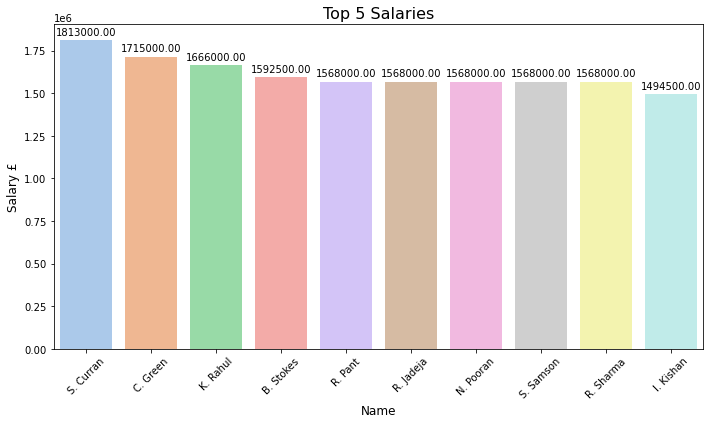

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Salary' column in descending order and select the top 5 rows
sorted_df = merged_df.sort_values(by='Salary £', ascending=False).head(10)

# Extract the 'Name' and 'Salary' columns from the sorted DataFrame
sorted_name = sorted_df['Name']
sorted_salary = sorted_df['Salary £']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("pastel")  # Use a pastel color palette

# Create the bar plot for the top 5 salaries
barplot = sns.barplot(x=sorted_name, y=sorted_salary, ax=ax)

# Customize the plot
ax.set_title("Top 5 Salaries", fontsize=16)
ax.set_xlabel("Name", fontsize=12)
ax.set_ylabel("Salary £", fontsize=12)  # Replace 'Salary' with 'Salary £'
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Add value labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points',
                     fontsize=10)

# Adjust spacing and layout
plt.tight_layout()

# Display the plot
plt.show()


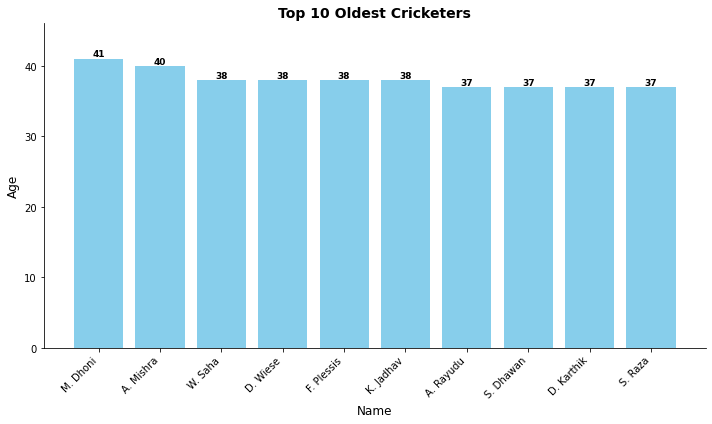

In [71]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains the 'Name' and 'Age' columns

# Sort the DataFrame by 'Age' in descending order
sorted_df = merged_df.sort_values('Age', ascending=False)

# Extract the top N oldest cricketers
n = 10  # Number of oldest cricketers to display
top_oldest = sorted_df.head(n)

# Create the bar chart with enhanced aesthetics
plt.figure(figsize=(10, 6))
bars = plt.bar(top_oldest['Name'], top_oldest['Age'], color='skyblue')

# Customize the chart appearance
plt.xlabel('Name', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Top {} Oldest Cricketers'.format(n), fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(top=max(top_oldest['Age']) + 5)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust the spacing
plt.show()


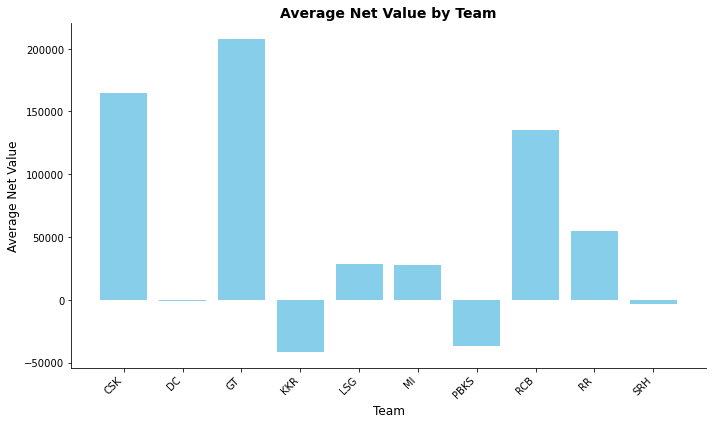

In [72]:
# Calculate the average 'Net value' for each team
avg_net_value = merged_df.groupby('Team')['Net value'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_net_value.index, avg_net_value.values, color='skyblue')

# Customize the chart appearance
plt.xlabel('Team', fontsize=12)
plt.ylabel('Average Net Value', fontsize=12)
plt.title('Average Net Value by Team', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust the spacing
plt.show()


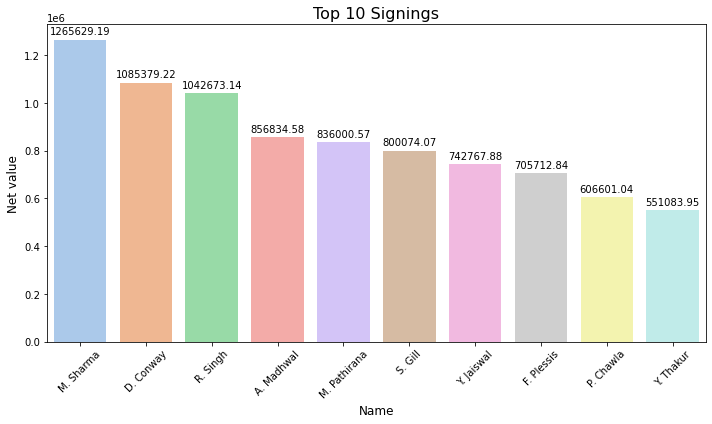

In [73]:
# Sort the DataFrame by 'Salary' column in descending order and select the top 5 rows
sorted_df = merged_df.sort_values(by='Net value', ascending=False).head(10)

# Extract the 'Name' and 'Salary' columns from the sorted DataFrame
sorted_name = sorted_df['Name']
sorted_salary = sorted_df['Net value']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("pastel")  # Use a pastel color palette

# Create the bar plot for the top 5 salaries
barplot = sns.barplot(x=sorted_name, y=sorted_salary, ax=ax)

# Customize the plot
ax.set_title("Top 10 Signings", fontsize=16)
ax.set_xlabel("Name", fontsize=12)
ax.set_ylabel("Net value", fontsize=12)  # Replace 'Salary' with 'Salary £'
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Add value labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points',
                     fontsize=10)

# Adjust spacing and layout
plt.tight_layout()

# Display the plot
plt.show()

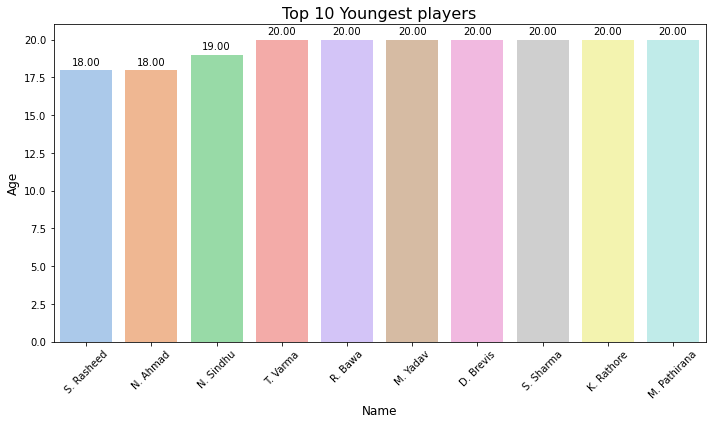

In [74]:
# Sort the DataFrame by 'Salary' column in descending order and select the top 5 rows
sorted_df = merged_df.sort_values(by='Age', ascending=True).head(10)

# Extract the 'Name' and 'Salary' columns from the sorted DataFrame
sorted_name = sorted_df['Name']
sorted_salary = sorted_df['Age']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("pastel")  # Use a pastel color palette

# Create the bar plot for the top 5 salaries
barplot = sns.barplot(x=sorted_name, y=sorted_salary, ax=ax)

# Customize the plot
ax.set_title("Top 10 Youngest players", fontsize=16)
ax.set_xlabel("Name", fontsize=12)
ax.set_ylabel("Age", fontsize=12)  # Replace 'Salary' with 'Salary £'
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Add value labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points',
                     fontsize=10)

# Adjust spacing and layout
plt.tight_layout()

# Display the plot
plt.show()

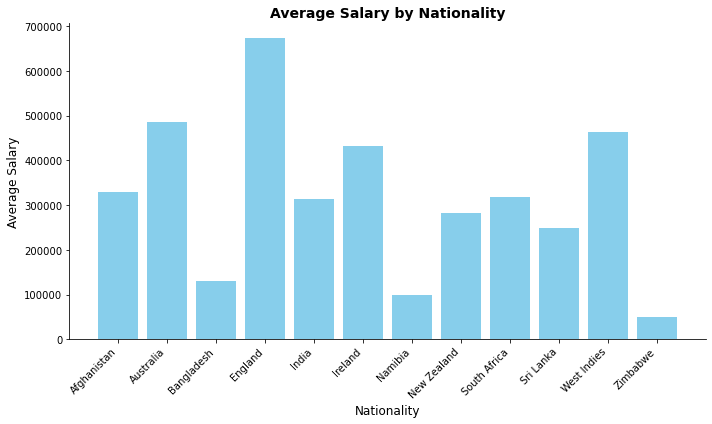

In [75]:
# Calculate the average 'Net value' for each team
avg_net_value = merged_df.groupby('Nationality')['Salary £'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_net_value.index, avg_net_value.values, color='skyblue')

# Customize the chart appearance
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.title('Average Salary by Nationality', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust the spacing
plt.show()


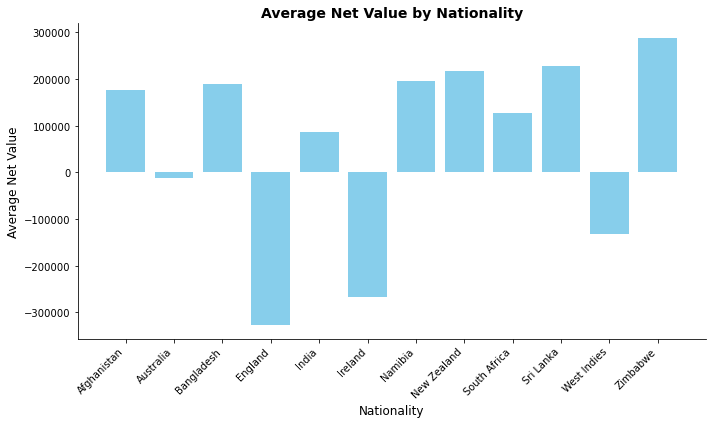

In [76]:
# Calculate the average 'Net value' for each team
avg_net_value = merged_df.groupby('Nationality')['Net value'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_net_value.index, avg_net_value.values, color='skyblue')

# Customize the chart appearance
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Net Value', fontsize=12)
plt.title('Average Net Value by Nationality', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust the spacing
plt.show()

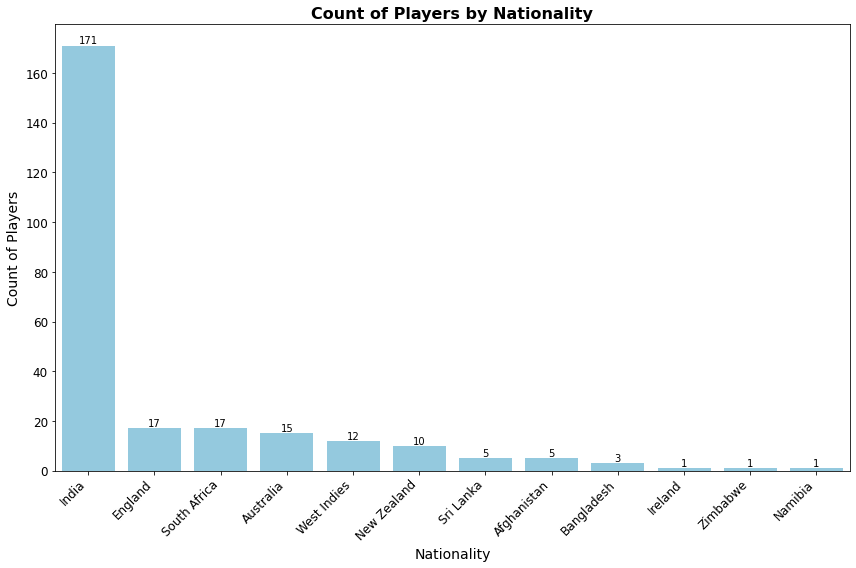

In [77]:
# Calculate the count of players for each nationality
count_by_nationality = merged_df['Nationality'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=count_by_nationality.index, y=count_by_nationality.values, color='skyblue')

# Customize the chart appearance
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Count of Players', fontsize=14)
plt.title('Count of Players by Nationality', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


# Add value labels to the bars
for i, value in enumerate(count_by_nationality.values):
    barplot.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust the spacing
plt.show()



In [78]:
# Want to see information of captains in the IPL
captain_df = ipl_df[ipl_df['Notes'].str.contains('Captain')]

print(captain_df)


      ID No.        Name  Team   Nationality  Age Batting style  \
6      7   7    M. Dhoni   CSK         India   41  Right-handed   
30    31  45   R. Sharma    MI         India   36  Right-handed   
56    57   1    K. Rahul   LSG         India   31  Right-handed   
86    87  11   S. Samson    RR         India   28  Right-handed   
105  106  13  F. Plessis   RCB  South Africa   38  Right-handed   
134  135  27     N. Rana   KKR         India   29   Left-handed   
157  158  42   S. Dhawan  PBKS         India   37   Left-handed   
182  183  31   D. Warner    DC     Australia   36   Left-handed   
207  208  94  A. Markram   SRH  South Africa   28  Right-handed   
244  245  33   H. Pandya    GT         India   29  Right-handed   

             Bowling style   Salary £                  Notes  
6         Right-arm medium 1176000.00                Captain  
30     Right-arm off break 1568000.00                Captain  
56        Right-arm medium 1666000.00                Captain  
86      Ri

##### Some key findings:
Despite Sam Curran being the most expensive player, the return on investment based on his performance and salary was the worst. (net value of £-1.8m

English overseas players seemed to have performed the worst in the IPL compared to other nationalities based on their actual salary, this may be due to over- inflated salaries seeing as England had just won the t20 2022 world cup.

Top 10 signings shows new potential prospects for future seasons.


###### Dataframes have been cleansed and loaded into a csv file which can be queried effectively in MySql

In [79]:
merged_df.to_csv('net_value.csv', index=False)
ipl_df.to_csv('ipl_dataframe.csv', index=False)

In [80]:
# Checking poor performances by net value for my team 'Gujarat Titans'
filtered_df = merged_df[merged_df['Team'].str.contains('GT')]

# Sorting the filtered DataFrame by the 'Net value' column in ascending order
filtered_df = filtered_df.sort_values('Net value', ascending=True)

# Displaying the filtered and sorted DataFrame
print(filtered_df)


      ID           Name Team   Nationality  Age   Salary £      Value  \
244  245      H. Pandya   GT         India   29 1470000.00  174350.07   
232  233     R. Tewatia   GT         India   30  882000.00  314628.30   
245  246        R. Khan   GT   Afghanistan   24 1470000.00  971573.13   
255  256      J. Little   GT       Ireland   23  431200.00  163239.30   
250  251       Y. Dayal   GT         India   25  313600.00  140321.97   
254  255        S. Mavi   GT         India   24  588000.00  550869.61   
235  236     A. Manohar   GT         India   28  254800.00  282683.52   
240  241        W. Saha   GT         India   38  186200.00  248655.42   
251  252      A. Joseph   GT   West Indies   26  235200.00  346572.27   
247  248       J. Yadav   GT         India   33  166600.00  337544.82   
234  235      D. Miller   GT  South Africa   33  294000.00  504906.21   
246  247     R. Kishore   GT         India   26  294000.00  550869.61   
249  250       M. Shami   GT         India   32  61